In [ ]:
import os
import cv2
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Sequential Image Search    

In [ ]:
import time
from ImageSearch_Serial import ImageSearch

start_time = time.monotonic()
search_results = ImageSearch("103900.jpg")
end_time = time.monotonic()
elapsed_time = end_time - start_time
print(f"Sequential Time: {elapsed_time:.3f} seconds")


Sequential Time : 218.12035130000004


In [ ]:
for sr in search_results[:20]:
    print(sr)

('103100.jpg', 0.0)
('103900.jpg', 0.0)
('103101.jpg', 28219.59148)
('103901.jpg', 28219.59148)
('103102.jpg', 75479.27246)
('103902.jpg', 75479.27246)
('103401.jpg', 97026.94494)
('101701.jpg', 99012.20856)
('103600.jpg', 101325.06426)
('101700.jpg', 108017.94473)
('103601.jpg', 114110.24021)
('103700.jpg', 114154.1707)
('106903.jpg', 114365.04628)
('103702.jpg', 120517.23292)
('107000.jpg', 121594.79383)
('107501.jpg', 126075.36175)
('104101.jpg', 126541.51763)
('101901.jpg', 132549.00935)
('101900.jpg', 133195.8741)
('103400.jpg', 134723.02462)


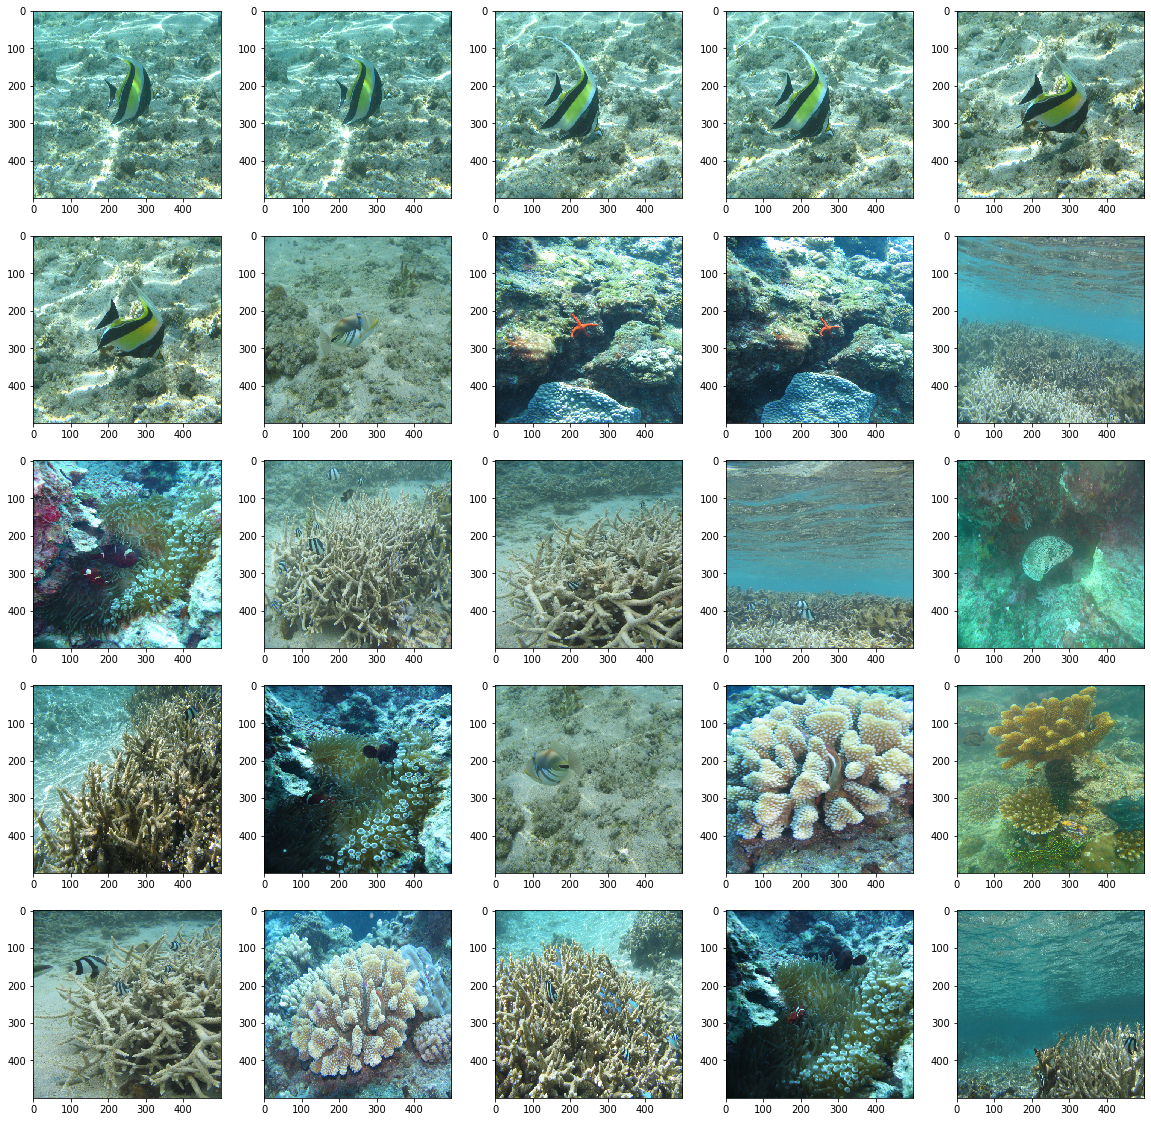

In [ ]:
def getImg(img):
    image_db_path = "Image_Database/"
    image = cv2.imread(f"{image_db_path}{img}")
    image = cv2.resize(image, (500,500))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    ax.imshow(getImg(search_results[i][0]))
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()


#    

# Parallel Image Search

In [ ]:
import time
from ImageSearch_Parallel import ImageSearch

def measure_time():
    start_time = time.perf_counter()
    search_results = ImageSearch("103900.jpg")
    end_time = time.perf_counter()
    return end_time - start_time

prl_time = measure_time()
print(f"Parallel Time : {prl_time}")


Parallel Time : 79.5207077


In [ ]:
for sr in search_results[:20]:
    print(sr)

('103900.jpg', 0.0)
('103100.jpg', 0.0)
('103901.jpg', 28219.59148)
('103101.jpg', 28219.59148)
('103902.jpg', 75479.27246)
('103102.jpg', 75479.27246)
('103401.jpg', 97026.94494)
('101701.jpg', 99012.20856)
('103600.jpg', 101325.06426)
('101700.jpg', 108017.94473)
('103601.jpg', 114110.24021)
('103700.jpg', 114154.1707)
('106903.jpg', 114365.04628)
('103702.jpg', 120517.23292)
('107000.jpg', 121594.79383)
('107501.jpg', 126075.36175)
('104101.jpg', 126541.51763)
('101901.jpg', 132549.00935)
('101900.jpg', 133195.8741)
('103400.jpg', 134723.02462)


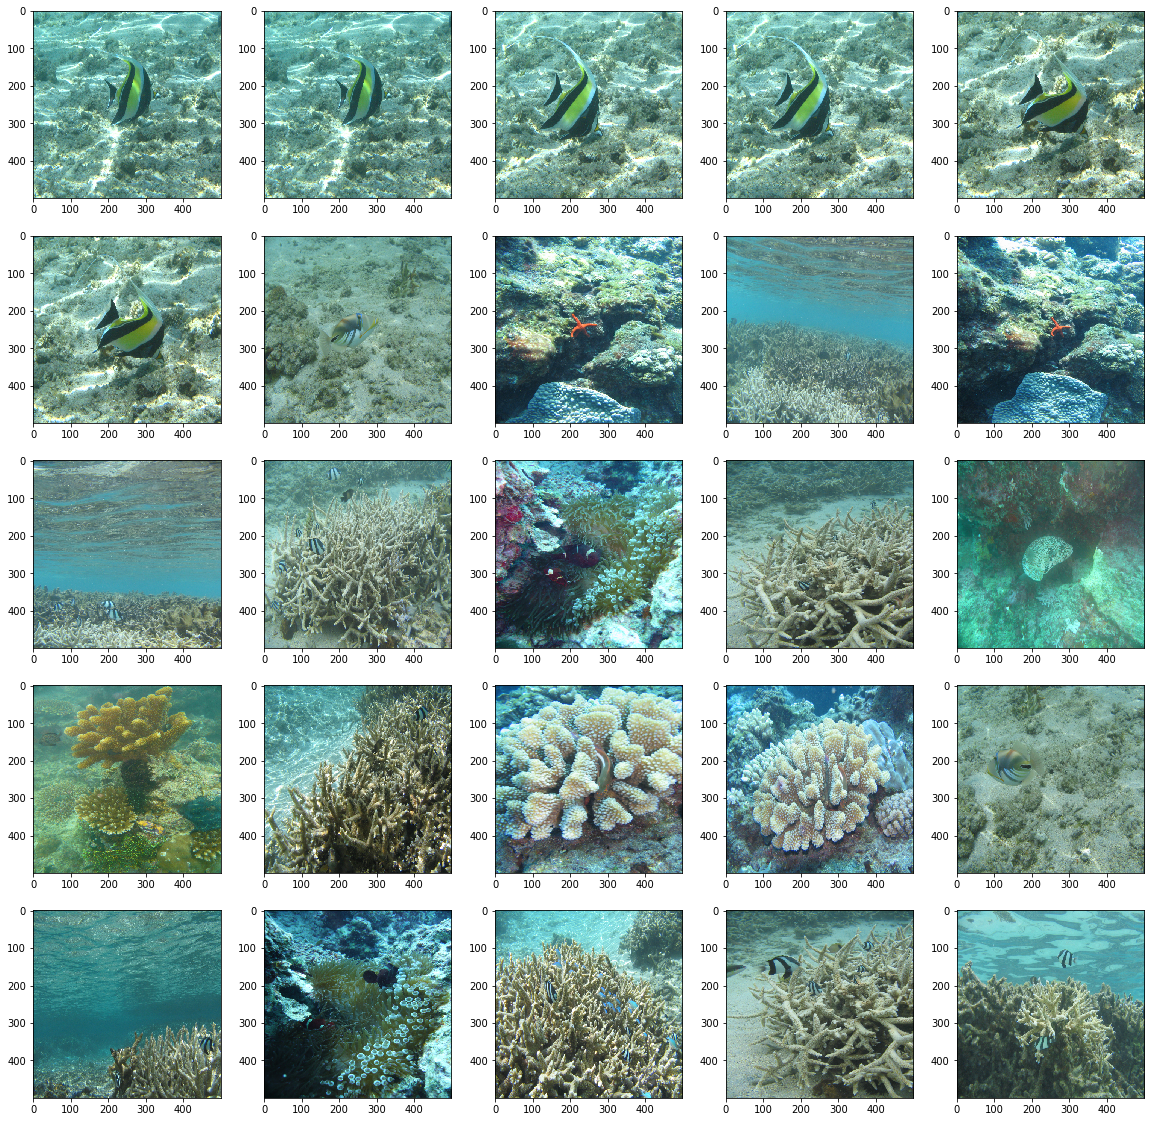

In [ ]:
from PIL import Image
import requests

image_db_path = "Image_Database/"

def getImg(img):
    response = requests.get(image_db_path + img)
    image = Image.open(BytesIO(response.content))
    image = image.resize((500, 500))
    image = image.convert('RGB')
    return image

images = [getImg(search_results[i][0]) for i in range(25)]

Image.merge('RGB', [img for img in images]).show()


#  

## Speedup

In [ ]:
print(f"Sequential Time: {seq_time}\n")
print(f"Parallel Time: {prl_time}\n\n")

speedup = seq_time / prl_time
print(f"Speedup Achieved: {speedup}")


Sequential Time :  218.12035130000004 

Parallel Time :  121.14971300000002 


Speedup Achieved :  1.8004198763557946
